In [1]:
import json

Step 1. Data Exploration, Basic Statistics and Data Structure Building

In [2]:
dataset = "./dmv-appointment-scheduler/data-set"
customer_path = dataset + "/CustomerData.json"
teller_path = dataset + "/TellerData.json"
customers_save_path = "./customers_match.csv"
tellers_save_path = "./tellers_match.csv"

In [3]:
with open(customer_path, "r") as customer_f:
    customer_data = json.load(customer_f)
    customer_lst = customer_data["Customer"]
customer_lst

[{'Id': '1032874543', 'type': '1', 'duration': '20'},
 {'Id': '1032874544', 'type': '1', 'duration': '20'},
 {'Id': '1032874545', 'type': '1', 'duration': '20'},
 {'Id': '1032874546', 'type': '1', 'duration': '20'},
 {'Id': '1032874547', 'type': '1', 'duration': '20'},
 {'Id': '1032874548', 'type': '1', 'duration': '20'},
 {'Id': '1032874549', 'type': '1', 'duration': '20'},
 {'Id': '1032874550', 'type': '1', 'duration': '20'},
 {'Id': '1032874551', 'type': '1', 'duration': '20'},
 {'Id': '1032874552', 'type': '1', 'duration': '20'},
 {'Id': '1032874553', 'type': '1', 'duration': '20'},
 {'Id': '1032874554', 'type': '1', 'duration': '20'},
 {'Id': '1032874555', 'type': '1', 'duration': '20'},
 {'Id': '1032874556', 'type': '1', 'duration': '20'},
 {'Id': '1032874557', 'type': '1', 'duration': '20'},
 {'Id': '1032874558', 'type': '1', 'duration': '20'},
 {'Id': '1032874559', 'type': '1', 'duration': '20'},
 {'Id': '1032874560', 'type': '1', 'duration': '20'},
 {'Id': '1032874561', 'type'

In [4]:
min_duration = float("inf")
for customer in customer_lst:
    min_duration = min(min_duration, int(customer["duration"]))
min_duration

5

In [5]:
with open(teller_path, "r") as teller_f:
    teller_data = json.load(teller_f)
    teller_lst = teller_data["Teller"]
teller_lst

[{'ID': '9001238456', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238457', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238458', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238459', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238460', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238461', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238462', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238463', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238464', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238465', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238466', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238467', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238468', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238469', 'SpecialtyType': '1', 'Multiplier': '0.75'},
 {'ID': '9001238470', 'SpecialtyType': '1', 'Multiplier': '0.7

In [6]:
for teller in teller_lst:
    teller["TimeUsed"] = 0
    teller["CustomerQueue"] = []
    
teller_lst

[{'ID': '9001238456',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238457',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238458',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238459',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238460',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238461',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238462',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238463',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 {'ID': '9001238464',
  'SpecialtyType': '1',
  'Multiplier': '0.75',
  'TimeUsed': 0,
  'CustomerQueue': []},
 

In [7]:
len(customer_lst), len(teller_lst)

(5000, 149)

In [8]:
customer_types = []
for customer in customer_lst:
    if customer["type"] not in customer_types:
        customer_types.append(customer["type"])
customer_types

['1', '2', '3', '4']

In [9]:
teller_specialties = []
for teller in teller_lst:
    if teller["SpecialtyType"] not in teller_specialties:
        teller_specialties.append(teller["SpecialtyType"])
teller_specialties

['1', '2', '3', '0']

In [10]:
customer_dict = {}
for customer_type in customer_types:
    customer_dict[customer_type] = []

#  {'Id': '1032874568', 'type': '1', 'duration': '20'},
for customer in customer_lst:
    customer_dict[customer['type']].append(customer)

customer_dict

{'1': [{'Id': '1032874543', 'type': '1', 'duration': '20'},
  {'Id': '1032874544', 'type': '1', 'duration': '20'},
  {'Id': '1032874545', 'type': '1', 'duration': '20'},
  {'Id': '1032874546', 'type': '1', 'duration': '20'},
  {'Id': '1032874547', 'type': '1', 'duration': '20'},
  {'Id': '1032874548', 'type': '1', 'duration': '20'},
  {'Id': '1032874549', 'type': '1', 'duration': '20'},
  {'Id': '1032874550', 'type': '1', 'duration': '20'},
  {'Id': '1032874551', 'type': '1', 'duration': '20'},
  {'Id': '1032874552', 'type': '1', 'duration': '20'},
  {'Id': '1032874553', 'type': '1', 'duration': '20'},
  {'Id': '1032874554', 'type': '1', 'duration': '20'},
  {'Id': '1032874555', 'type': '1', 'duration': '20'},
  {'Id': '1032874556', 'type': '1', 'duration': '20'},
  {'Id': '1032874557', 'type': '1', 'duration': '20'},
  {'Id': '1032874558', 'type': '1', 'duration': '20'},
  {'Id': '1032874559', 'type': '1', 'duration': '20'},
  {'Id': '1032874560', 'type': '1', 'duration': '20'},
  {'I

In [11]:
teller_dict = {}
for teller_specialty in teller_specialties:
    teller_dict[teller_specialty] = []
    
# {'ID': '9001238459', 'SpecialtyType': '1', 'Multiplier': '0.75'}
for teller in teller_lst:
    teller_dict[teller["SpecialtyType"]].append(teller)

teller_dict

{'1': [{'ID': '9001238456',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238457',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238458',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238459',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238460',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238461',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238462',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238463',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238464',
   'SpecialtyType': '1',
   'Multiplier': '0

In [12]:
for type_, tellers in teller_dict.items():
    print(type_, len(tellers))

1 29
2 50
3 50
0 20


In [13]:
matched_types = []
unmatched_customer_types = []
unmatched_teller_specialties = []

for customer_type in customer_types:
    if customer_type in teller_specialties:
        matched_types.append(customer_type)
    else:
        unmatched_customer_types.append(customer_type)
        
for teller_specialty in teller_specialties:
    if teller_specialty not in customer_types:
        unmatched_teller_specialties.append(teller_specialty)
        
print(matched_types)
print(unmatched_customer_types)
print(unmatched_teller_specialties)

['1', '2', '3']
['4']
['0']


In [14]:
customer_dict["unmatched"] = []
for type_ in unmatched_customer_types:
    customer_dict["unmatched"] += customer_dict[type_]
    customer_dict.pop(type_)

print(customer_dict.keys())
customer_dict

dict_keys(['1', '2', '3', 'unmatched'])


{'1': [{'Id': '1032874543', 'type': '1', 'duration': '20'},
  {'Id': '1032874544', 'type': '1', 'duration': '20'},
  {'Id': '1032874545', 'type': '1', 'duration': '20'},
  {'Id': '1032874546', 'type': '1', 'duration': '20'},
  {'Id': '1032874547', 'type': '1', 'duration': '20'},
  {'Id': '1032874548', 'type': '1', 'duration': '20'},
  {'Id': '1032874549', 'type': '1', 'duration': '20'},
  {'Id': '1032874550', 'type': '1', 'duration': '20'},
  {'Id': '1032874551', 'type': '1', 'duration': '20'},
  {'Id': '1032874552', 'type': '1', 'duration': '20'},
  {'Id': '1032874553', 'type': '1', 'duration': '20'},
  {'Id': '1032874554', 'type': '1', 'duration': '20'},
  {'Id': '1032874555', 'type': '1', 'duration': '20'},
  {'Id': '1032874556', 'type': '1', 'duration': '20'},
  {'Id': '1032874557', 'type': '1', 'duration': '20'},
  {'Id': '1032874558', 'type': '1', 'duration': '20'},
  {'Id': '1032874559', 'type': '1', 'duration': '20'},
  {'Id': '1032874560', 'type': '1', 'duration': '20'},
  {'I

In [15]:
teller_dict["unmatched"] = []
for type_ in unmatched_teller_specialties:
    teller_dict["unmatched"] += teller_dict[type_]
    teller_dict.pop(type_)

print(teller_dict.keys())
teller_dict

dict_keys(['1', '2', '3', 'unmatched'])


{'1': [{'ID': '9001238456',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238457',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238458',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238459',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238460',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238461',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238462',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238463',
   'SpecialtyType': '1',
   'Multiplier': '0.75',
   'TimeUsed': 0,
   'CustomerQueue': []},
  {'ID': '9001238464',
   'SpecialtyType': '1',
   'Multiplier': '0

In [16]:
customer_info = {}
customer_info["matched_types"] = matched_types
customer_info["unmatched_types"] = unmatched_customer_types

for type_, detail in customer_dict.items():
    customer_info[type_] = dict()
    customer_info[type_]["done"] = False
    customer_info[type_]["length"] = len(detail)
    customer_info[type_]["duration_undone"] = 0
    for cust in detail:
        customer_info[type_]["duration_undone"] += float(cust["duration"])

customer_info

{'matched_types': ['1', '2', '3'],
 'unmatched_types': ['4'],
 '1': {'done': False, 'length': 2555, 'duration_undone': 36775.0},
 '2': {'done': False, 'length': 998, 'duration_undone': 29940.0},
 '3': {'done': False, 'length': 946, 'duration_undone': 7600.0},
 'unmatched': {'done': False, 'length': 501, 'duration_undone': 17400.0}}

In [17]:
teller_info = {}
teller_info["matched_types"] = matched_types
teller_info["unmatched_types"] = unmatched_teller_specialties

for type_, detail in teller_dict.items():
    teller_info[type_] = dict()
    teller_info[type_]["done"] = False
    teller_info[type_]["length"] = len(detail)
    teller_info[type_]["multiplier_avg"] = 0
    for tell in detail:
        teller_info[type_]["multiplier_avg"] += float(tell["Multiplier"])
    teller_info[type_]["multiplier_avg"] /= teller_info[type_]["length"]
    
teller_info["unmatched"]["multiplier_avg"] = 1.0

teller_info

{'matched_types': ['1', '2', '3'],
 'unmatched_types': ['0'],
 '1': {'done': False, 'length': 29, 'multiplier_avg': 0.6637931034482759},
 '2': {'done': False, 'length': 50, 'multiplier_avg': 0.7370000000000002},
 '3': {'done': False, 'length': 50, 'multiplier_avg': 0.8459999999999994},
 'unmatched': {'done': False, 'length': 20, 'multiplier_avg': 1.0}}

Maintian a Max Heap for the Customer Duration Needed and a Min Heap for the Teller Time Used.

In [18]:
class MaxHeap:
    def __init__(self, lst, key):
        self.heap = list(lst)
        self.key = key
        self.build_heap()

    def __len__(self):
        return len(self.heap)

    def build_heap(self):
        n = len(self.heap)
        for i in range((n - 1) // 2, -1, -1):
            self.siftdown(i, n - 1)

    def siftdown(self, begin, end):
        i, j = begin, 2 * begin + 1
        while j <= end:
            if j + 1 <= end and self.heap[j + 1][self.key] > self.heap[j][self.key]:
                j += 1
            if self.heap[i][self.key] >= self.heap[j][self.key]:
                break
            self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
            i, j = j, 2 * j + 1

    def siftup(self, begin):
        i, j = begin, (begin - 1) // 2
        while j >= 0 and self.heap[i][self.key] > self.heap[j][self.key]:
            self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
            i, j = j, (j - 1) // 2

    def enqueue(self, item):
        self.heap.append(item)
        self.siftup(len(self.heap) - 1)

    def dequeue(self):
        self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
        item = self.heap.pop()
        self.siftdown(0, len(self.heap) - 1)
        return item

    def top(self):
        return self.heap[0]

In [19]:
class MinHeap:
    def __init__(self, lst, key):
        self.heap = list(lst)
#         self.heap.sort(key=lambda x: x["Multiplier"])  # modify 3
        self.key = key
        self.build_heap()

    def __len__(self):
        return len(self.heap)
    
    def build_heap(self):
        n = len(self.heap)
        for i in range((n - 1) // 2, -1, -1):
            self.siftdown(i, n - 1)

    def siftdown(self, begin, end):
        i, j = begin, 2 * begin + 1
        while j <= end:
            if j + 1 <= end and self.heap[j + 1][self.key] < self.heap[j][self.key]:
                j += 1
            if self.heap[i][self.key] <= self.heap[j][self.key]:
                break
            self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
            i, j = j, 2 * j + 1

    def siftup(self, begin):
        i, j = begin, (begin - 1) // 2
        while j >= 0 and self.heap[i][self.key] < self.heap[j][self.key]:
            self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
            i, j = j, (j - 1) // 2

    def enqueue(self, item):
        self.heap.append(item)
        self.siftup(len(self.heap) - 1)

    def dequeue(self):
        self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
        item = self.heap.pop()
        self.siftdown(0, len(self.heap) - 1)
        return item

    def top(self):
        return self.heap[0]

In [20]:
def build_max_heaps(info, dict_, key):
    max_heaps = dict()
    for type_ in dict_:
        max_heaps[type_] = MaxHeap(dict_[type_], key)
    return max_heaps

In [21]:
def build_min_heaps(info, dict_, key):
    min_heaps = dict()
    for type_ in dict_:
        min_heaps[type_] = MinHeap(dict_[type_], key)
    return min_heaps

In [22]:
customer_maxheaps = build_max_heaps(customer_info, customer_dict, key="duration")
teller_minheaps = build_min_heaps(teller_info, teller_dict, key="TimeUsed")

In [23]:
# Step 2: Estimate the duration needed for each teller category and update this information in teller_info ["need time"]
# Return the SpecialtyType with the minimum duration among all the SpecialtyTypes, and get that minimum duration as well

def estimate_time_of_a_type(customer_info, teller_info):
    min_time = float("inf")
    min_type = None
    for key in teller_info.keys():
        if key not in ["matched_types", "unmatched_types"]:
            need_time = customer_info[key]["duration_undone"] * teller_info[key]["multiplier_avg"] / teller_info[key]["length"]
            teller_info[key]["need_time"] = need_time
            if need_time < min_time:
                min_time = need_time
                min_type = key
            
#             print("type = {}, need_time = {}".format(key, need_time))
    
    return min_type, min_time


In [24]:
# Step 3.1 Matching Customers with Tellers
# pop out the customer and teller from the heap with the same type, match them, and put the customer in the customer_done list，
# customer_info will be updated，the teller will be put back to the teller minheap with updated Time Used and Customer Queue，teller_info will be updated as well
# if time_limit is infinite, that means we want to match all the customer appointments in the corresponding teller category.

def match(type_, customer_info, teller_info, customer_maxheaps, teller_minheaps, customer_done, time_limit):
    start = True
    while (start or teller_minheaps[type_].top()["TimeUsed"] < time_limit) and len(customer_maxheaps[type_]) > 0:
        start = False
        max_customer = customer_maxheaps[type_].dequeue()
        min_teller = teller_minheaps[type_].dequeue()
        time = float(max_customer["duration"]) * float(min_teller["Multiplier"])

        max_customer["MatchedTeller"] = min_teller["ID"]
        customer_done.append(max_customer)

        min_teller["CustomerQueue"].append(max_customer["Id"])
        min_teller["TimeUsed"] += time
        teller_minheaps[type_].enqueue(min_teller) # put the teller back to the teller minheap after poping and matching

        customer_info[type_]["length"] -= 1
        customer_info[type_]["duration_undone"] -= float(max_customer["duration"])
    
    if time_limit == float("inf"):
        customer_info[type_]["done"] = True
        teller_info[type_]["done"] = True

In [25]:

# If we just finished matching all customers in the "unmatched" category with the "unmatched" tellers, then we keep the tellers of "unmatched" in its category and prepare them for new assignments.
# We move some of other types of customers to the "unmatched category" as well.

def arrange_unmatched(customer_info, teller_info, customer_maxheaps, teller_minheaps):
    def _arrange(max_type, target):
        cur_time = 0
        while cur_time < target and len(customer_maxheaps[max_type]) > 0:
            customer = customer_maxheaps[max_type].dequeue()
            customer_maxheaps["unmatched"].enqueue(customer)
            cur_time += float(customer["duration"])
            customer_info[max_type]["length"] -= 1
            customer_info[max_type]["duration_undone"] -= float(customer["duration"])
            customer_info["unmatched"]["length"] += 1
            customer_info["unmatched"]["duration_undone"] += float(customer["duration"])
        
    min_time = float("inf")
    min_type = None
    max_time = float("-inf")
    max_type = None
    for key in customer_maxheaps:
        if key != "unmatched":
            time = float(customer_info[key]["duration_undone"]) * float(teller_info[key]["multiplier_avg"])
            if time < min_time:
                min_time = time
                min_type = key
            if time > max_time:
                max_time = time
                max_type = key # then we get the type of customers with the most duration left to assign, and the minimum duration from other types left
    
    if max_time > 2 * min_time: # this is not the most optimized solution but a quick one
        _arrange(max_type, min_time) # if we have more than two categories of customers left, one type of customer's duration is significantly (an approximation) longer than the other, then we move some customers from the larger duration to the "unmatched" category, and the duration is equal to the smallest duration in the categories left.
    else:
        if max_time - min_time > 0:
            _arrange(max_type, max_time - min_time) #if we have more than two categories of customers left, one type of customer's duration is not significantly (an approximation) longer than the other, then we move a bit customers from the larger duration to the "unmatched" category
        else:
            _arrange(max_type, max_time / 2) # if we only have one type of tellers and the corresponding customers left, we move half of the customer duration to the "unmatched" category
    

In [26]:
# Step 3.2 Update info
# if we just finished matching all customers in a category that's not in the "unmatched" category with the corresponding tellers, then we move all the tellers in this category to the "unmatched" category.
# if we just finished matching all customers in a category that's in the "unmatched" category with the corresponding tellers, then we do NOT move the tellers in this "unmatched" category.


def update_info(customer_info, teller_info, customer_maxheaps, teller_minheaps):
    keys = list(customer_info.keys())
    for key in keys:
        if key not in ["matched_types", "unmatched_types"]:
            if key == "unmatched":
                customer_info[key]["done"] = False
                teller_info[key]["done"] = False
                arrange_unmatched(customer_info, teller_info, customer_maxheaps, teller_minheaps)
                # we keep the tellers of "unmatched" in its category and prepare them for new assignments.
                # We move some of other types of customers to the "unmatched category" as well.
            else: 
                if customer_info[key]["done"] and teller_info[key]["done"]: # if we just picked a category with minimum estimated time from step 1 that is not in the "unmatched" category, and we matcheded all the corresponding customers in this category with the tellers
                    customer_info.pop(key)
                    customer_maxheaps.pop(key)
                    while len(teller_minheaps[key]) > 0:
                        teller_minheaps["unmatched"].enqueue(teller_minheaps[key].dequeue())# then we move all the tellers in this category to the "unmatched" category
                    teller_info["unmatched"]["length"] += teller_info[key]["length"] # we update the teller information
                    teller_info.pop(key)
                    

In [27]:
# Termination condition: if we have any customers left in the customer_info dict, we are not done with the assignment yet.
def is_done(customer_info):  # 
    for key in customer_info.keys():
        if key not in ["matched_types", "unmatched_types"]:
            if customer_info[key]["length"] > 0:
                return False
    return True

In [28]:
customer_done = []
accu_time = 0

while not is_done(customer_info):  # Termination Condition
    cur_type, esti_time = estimate_time_of_a_type(customer_info, teller_info) # pick the category with the least estimated time
    accu_time += esti_time
    for type_ in customer_maxheaps.keys():
        if type_ == cur_type: # We want to match all customers in this picked category
            match(type_, customer_info, teller_info, customer_maxheaps, teller_minheaps, customer_done, time_limit=float("inf"))
        else: # We want to match the customer appointments up to a time limit estimated from the 2nd step
            match(type_, customer_info, teller_info, customer_maxheaps, teller_minheaps, customer_done, time_limit=accu_time)
    update_info(customer_info, teller_info, customer_maxheaps, teller_minheaps)
    # After this assignment iteration, we update all customer and teller information
    
    

In [29]:
# Print out all final customer and teller information:
# Conclusion: All customer appointments assigned. 0 Customers left. 0 duration_undone.
print(customer_info)
print("\n")
print(teller_info)
print("\n")
for maxheap in customer_maxheaps.values():
    print(len(maxheap.heap))
print("\n")
for minheap in teller_minheaps.values():
    print(len(minheap.heap))
print("\n")

{'matched_types': ['1', '2', '3'], 'unmatched_types': ['4'], 'unmatched': {'done': False, 'length': 0, 'duration_undone': 0.0}}


{'matched_types': ['1', '2', '3'], 'unmatched_types': ['0'], 'unmatched': {'done': False, 'length': 149, 'multiplier_avg': 1.0, 'need_time': 0.08333333333333333}}


0


0
0
0
149




## Generate Results: The Maximum Duration of All Tellers' Appointments is 498.75

In [31]:
# Generate results: The maximum duration of all tellers' appointments is 498.75
def generate_teller_done(teller_minheaps):
    teller_done = []
    for minheap in teller_minheaps.values():
        teller_done += minheap.heap
    return teller_done

teller_done = generate_teller_done(teller_minheaps)
teller_time_all = []
for teller in teller_done:
    time_used = teller["TimeUsed"]
    teller_time_all.append(time_used)

min(teller_time_all), max(teller_time_all)

(460.0, 498.75)

## Results Display: The Service Duration of Each Teller Displayed

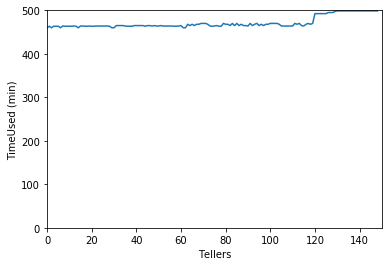

In [32]:
# The Service Duration of Each Teller Displayed
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
x = range(len(teller_time_all))
plt.plot(x, teller_time_all)
plt.xlim(0, 150)
plt.ylim(0, 500)
plt.xlabel("Tellers")
plt.ylabel("TimeUsed (min)")
plt.show()

The minimum duration of all tellers' appointments is 460 min, and the maximum duration is 498.75 min.
customer_done includes all customers' appointment information.
teller_done includes all tellers' appointment information.

In [33]:
import pandas as pd

In [34]:
customers_df = pd.DataFrame(customer_done)
customers_df

,Id,type,duration,MatchedTeller
0,1032874543,1,20,9001238456
1,1032874544,1,20,9001238484
2,1032874546,1,20,9001238457
3,1032874550,1,20,9001238459
4,1032874558,1,20,9001238463
...,...,...,...,...
4995,1032876333,1,10,9001238582
4996,1032876530,1,10,9001238484
4997,1032876246,1,10,9001238560
4998,1032876202,1,10,9001238529


In [35]:
tellers_df = pd.DataFrame(teller_done)
tellers_df

,ID,SpecialtyType,Multiplier,TimeUsed,CustomerQueue
0,9001238588,0,1,460.00,"[1032879388, 1032879408, 1032879428, 103287950..."
1,9001238539,3,0.9,463.50,"[1032878357, 1032878244, 1032878176, 103287843..."
2,9001238593,0,1,460.00,"[1032879536, 1032879512, 1032879488, 103287950..."
3,9001238555,3,0.9,463.50,"[1032878359, 1032878394, 1032878413, 103287843..."
4,9001238541,3,0.9,463.50,"[1032878370, 1032878114, 1032878135, 103287818..."
...,...,...,...,...,...
144,9001238470,1,0.75,498.75,"[1032875065, 1032874808, 1032875093, 103287511..."
145,9001238461,1,0.75,498.75,"[1032874801, 1032875078, 1032874819, 103287482..."
146,9001238469,1,0.75,498.75,"[1032874803, 1032874810, 1032875099, 103287510..."
147,9001238460,1,0.75,498.75,"[1032875055, 1032875077, 1032874681, 103287511..."


The Results are extracted to .csv files.

In [36]:
customers_df.to_csv(customers_save_path, sep=",", index=False)
tellers_df.to_csv(tellers_save_path, sep=",", index=False)